## np.meshgrid 이해

In [1]:
import numpy as np

X, Y = np.meshgrid(
    np.arange(12, 21),   # player가 가진 카드 합계 (12~21)
    np.arange(1, 11))    # dealer가 공개한 카드 (1~10)

In [2]:
# 플레이어의 카드 합계
X

array([[12, 13, 14, 15, 16, 17, 18, 19, 20],
       [12, 13, 14, 15, 16, 17, 18, 19, 20],
       [12, 13, 14, 15, 16, 17, 18, 19, 20],
       [12, 13, 14, 15, 16, 17, 18, 19, 20],
       [12, 13, 14, 15, 16, 17, 18, 19, 20],
       [12, 13, 14, 15, 16, 17, 18, 19, 20],
       [12, 13, 14, 15, 16, 17, 18, 19, 20],
       [12, 13, 14, 15, 16, 17, 18, 19, 20],
       [12, 13, 14, 15, 16, 17, 18, 19, 20],
       [12, 13, 14, 15, 16, 17, 18, 19, 20]])

In [3]:
# 딜러의 공개 카드
Y

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 6,  6,  6,  6,  6,  6,  6,  6,  6],
       [ 7,  7,  7,  7,  7,  7,  7,  7,  7],
       [ 8,  8,  8,  8,  8,  8,  8,  8,  8],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  9],
       [10, 10, 10, 10, 10, 10, 10, 10, 10]])

## np.dstack 이해

In [11]:
# (플레이어 카드합계, 딜러 공개 카드) pair 생성
print(np.dstack([X, Y]).shape)
np.dstack([X, Y])[0]

(10, 10, 2)


array([[12,  1],
       [13,  1],
       [14,  1],
       [15,  1],
       [16,  1],
       [17,  1],
       [18,  1],
       [19,  1],
       [20,  1],
       [21,  1]])

## defaultdict 이해

defaultdict는 Python의 collections 모듈에서 제공하는 딕셔너리 서브클래스입니다. defaultdict는 일반적인 딕셔너리와 유사하지만, 존재하지 않는 키를 조회할 때 KeyError를 발생시키는 대신, 기본값을 반환하도록 설정할 수 있습니다. 이를 통해 코드의 간결성과 가독성을 높일 수 있습니다.  

키가 존재하지 않는 경우, defaultdict는 지정된 기본값을 자동으로 초기화하여 추가합니다. 따라서 키 존재 여부를 확인하거나 미리 초기화할 필요가 없습니다.

In [5]:
from collections import defaultdict

num_actions = 4
pi = defaultdict(lambda: np.ones(num_actions, dtype=float) / num_actions)
pi

defaultdict(<function __main__.<lambda>()>, {})

In [6]:
P = pi[0]
print(P)

[0.25 0.25 0.25 0.25]


In [13]:
# V를 defaultdict로 정의하고 임의의 값으로 초기화
V = defaultdict(float)

for player_total in range(12, 22):  # 플레이어의 카드 합계가 12에서 21인 경우
    for dealer_upcard in range(1, 11):  # 딜러의 공개 카드가 1에서 10인 경우
        V[(player_total, dealer_upcard, False)] = np.random.random()  # 사용 가능한 에이스가 없는 경우 임의의 값 할당
        V[(player_total, dealer_upcard, True)] = np.random.random()  # 사용 가능한 에이스가 있는 경우 임의의 값 할당

V[(12, 1, False)]

0.4921284510663273

- 플레이어의 카드 합계(X)와 딜러의 공개 카드(Y)의 모든 조합에 대해, usable ace(사용 가능한 에이스)가 없는 상태를 가정하고,
해당 상태에서의 가치 함수 값 `V[(player_sum, dealer_card, False)]`를 구한 뒤, 그 결과를 2차원 배열(no_usable_ace)로 저장한다.
- 이 2차원 배열의 각 위치는 `플레이어의 카드 합(12~21)`과 `딜러의 공개 카드(1~10)`의 조합에 대해, usable ace가 없을 때 해당 상태의 가치 함수 값을 나타냅니다.
```
np.apply_along_axis(func1d, axis, arr, *args, **kwargs)  
  func1d : 입력이 1차원 배열이고, 결과를 반환하는 사용자 정의 함수  
  axis : arr에서 어느 축을 따라 함수 적용할지 지정 (예: 0=행, 1=열, 2=depth 등)  
  arr : 입력 배열. n차원 배열 가능
```

In [16]:
# 플레이어의 카드 합계와 딜러의 공개 카드를 그리드로 생성
X, Y = np.meshgrid(np.arange(12, 22), np.arange(1, 11))

# 사용 가능한 에이스가 없는 경우에 대한 가치 함수 값을 계산
# V[(player의 hand 합계, dealer 공개 카드, 사용 가능한 에이스 보유)]
no_usable_ace = np.apply_along_axis(lambda idx: V[(idx[0], idx[1], False)], 2, np.dstack([X, Y]))

# 결과 출력
print(no_usable_ace.shape)
print(no_usable_ace[0])

(10, 10)
[0.49212845 0.81927807 0.87249959 0.16921996 0.61242354 0.61752707
 0.45701757 0.20530794 0.30555815 0.16512876]


- plot_surface()는 (X, Y) 평면 위의 Z값을 3D로 시각화하는 함수

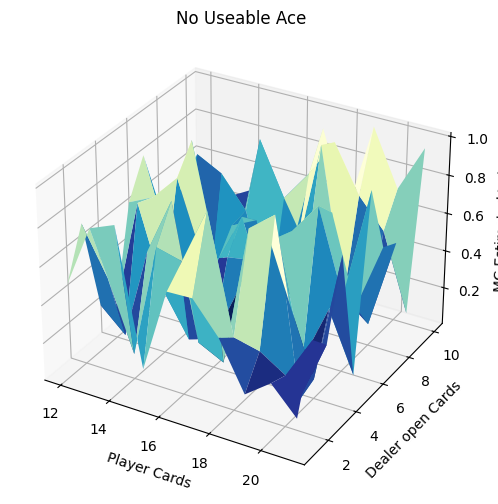

In [17]:
import matplotlib.pyplot as plt

# 3D 그래프를 위한 플롯 생성 (1행 1열, 3D 서브플롯)
fig, ax0 = plt.subplots(1, 1, figsize=(10, 6), subplot_kw={'projection': '3d'})

# 3D 표면 그래프 그리기
# X: 플레이어 합계, Y: 딜러 공개 카드, Z: 해당 상태의 가치 함수 값
ax0.plot_surface(X, Y, no_usable_ace, cmap=plt.cm.YlGnBu_r)

# x축 라벨: 플레이어 카드 합
ax0.set_xlabel('Player Cards') 

# y축 라벨: 딜러의 오픈 카드
ax0.set_ylabel('Dealer open Cards') 

# z축 라벨: 몬테카를로로 추정한 상태 가치
ax0.set_zlabel('MC Estimated Value') 

ax0.set_title('No Useable Ace')

plt.show()